In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
def directory_to_df(path : str):
    images = []
    labels = []
    chars = 'ABCDEFG'
    for cls in os.listdir(path):
        cls_path = os.path.join(path,cls)
        cls_name = cls.split('_')[0]
        if not cls_name in chars:
            continue
        for img_path in os.listdir(cls_path):
            direct = os.path.join(cls_path,img_path)
            img = cv2.imread(os.path.join(cls_path, img_path), cv2.IMREAD_GRAYSCALE)
            images.append(img)
            labels.append(cls_name)

    return (np.array(images), np.array(labels))

In [3]:
main_path = 'dataset_demo2/'
X, y = directory_to_df(main_path)                   
print(X.shape)
print(y)

(10419, 60, 40)
['A' 'A' 'A' ... 'C' 'C' 'C']


## Label Encoding

In [6]:
y, class_names = pd.factorize(y, sort=True)
print(y)
print(class_names)

[0 0 0 ... 2 2 2]
[0 1 2]


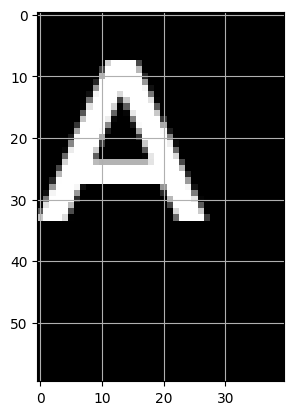

In [7]:
import matplotlib.pyplot as plt

idx = 1
img = X[idx]                       # 
plt.imshow(img, cmap=plt.cm.gray_r)      # actutal BG is black
# plt.imshow(img, cmap=plt.cm.gray) 

plt.grid()
plt.show()


## Train-test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

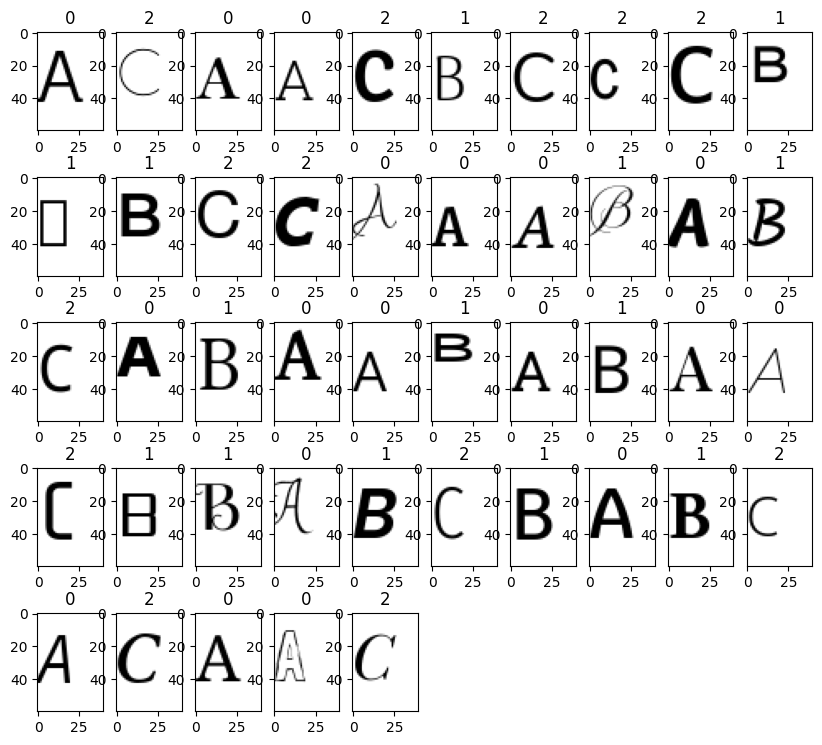

In [9]:
def visual_multi(i):
    nplots = 45
    fig = plt.figure(figsize=(10, 11)) 
    for j in range(nplots):
        plt.subplot(6, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray)
        plt.title(y_train[i+j])
        # plt.xticks([]); # plt.yticks([])
    plt.show()

visual_multi(0)

In [10]:
print(X_train.shape)
print(X_test.shape)

(7814, 60, 40)
(2605, 60, 40)


## Prepare Dataset (Re-shape the Structure)

In [11]:
X_train = np.expand_dims(X_train, -1)     # run only Once! or  np.squeeze(X_train)
X_test = np.expand_dims(X_test, -1)

In [12]:
print(X_train.shape)
print(X_test.shape) 

(7814, 60, 40, 1)
(2605, 60, 40, 1)


In [13]:
# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [14]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [13]:
num_samples = 900      # number of samples

X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

X_test = X_test[:num_samples]
y_test = y_test[:num_samples]

In [15]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(7814, 60, 40, 1), y=(7814,)
Test: X=(2605, 60, 40, 1), y=(2605,)


# Create Model

In [ ]:
in_shape = X_train.shape[1:]
in_shape

3

In [17]:
in_shape = X_train.shape[1:]
in_shape

(60, 40, 1)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten #, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu')) 

model.add(Dense(num_classes, activation='softmax'))

/opt/homebrew/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 38, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 19, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 17, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6656)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       852,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 871,299 (3.32 MB)

 Trainable params: 871,299 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
# สมมติว่า y_train และ y_test มีค่าป้ายกำกับที่เป็น string
y_train = np.array([int(label) for label in y_train])
y_test = np.array([int(label) for label in y_test])

In [22]:
import time
start = time.time()

history = model.fit(X_train, y_train, epochs=25, batch_size=128, verbose=1, validation_split=0.15) 

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6928 - loss: 0.6874 - val_accuracy: 0.9165 - val_loss: 0.2197
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9215 - loss: 0.2000 - val_accuracy: 0.9284 - val_loss: 0.1610
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9454 - loss: 0.1328 - val_accuracy: 0.9463 - val_loss: 0.1467
Epoch 4/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9517 - loss: 0.1150 - val_accuracy: 0.9488 - val_loss: 0.1276
Epoch 5/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9513 - loss: 0.0995 - val_accuracy: 0.9454 - val_loss: 0.1144
Epoch 6/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9578 - loss: 0.0880 - val_accuracy: 0.9420 - val_loss: 0.1382
Epoch 7/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9604 - loss: 0.0882 - val_accuracy: 0.9480 - val_loss: 0.1164
Epoch 8/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9665 - loss: 0.0814 - val_accuracy: 0.9514 - v

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9556 - loss: 0.1217
Accuracy: 0.954


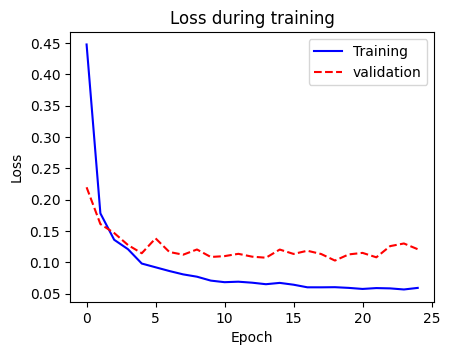

In [24]:
plt.figure(figsize=(4.7, 3.5))
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.title('Loss during training')
plt.legend()
plt.show()

# Predict an image

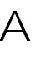

In [33]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

# conda
img = load_img('images/alphabet/Screenshot 2024-09-24 143426.jpg', target_size=(60, 40))
#img = load_img('images/alphabet/Screenshot 2024-09-24 143436.jpg', target_size=(60, 40))
#img = load_img('images/alphabet/Screenshot 2024-09-24 143501.jpg', target_size=(60, 40))
#img = load_img('images/alphabet/D_U_36.png', target_size=(60, 40))
img


In [34]:
from PIL import Image, ImageOps

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
print('max pixel value=',np.max(img))

img = img /255.0
print('max pixel value=',np.max(img))

img = np.expand_dims(img, axis=0)
img.shape

shape= (60, 40, 1)
max pixel value= 254.97452
max pixel value= 0.99990004


(1, 60, 40, 1)

In [35]:
y_pred = model.predict(img)
print(y_pred.round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[1. 0. 0.]]


In [36]:
predicted = np.argmax(y_pred, -1) 
print(predicted)

[0]


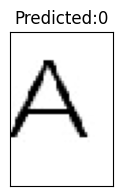

In [37]:
plt.figure(figsize=(2, 2))
plt.imshow(img[0].reshape(60, 40), cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model.save('digitmodel.h5')